 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [125]:
#Initial Imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [126]:
# Reading whale returns
#create a path to the whale returns file
whale_returns_csv = Path("../resources/whale_returns.csv")
# read the whale returns csv data
whale_returns_df = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True).sort_index(ascending = True)

# whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [127]:
# Count nulls
# Identify number of nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [128]:
# Drop nulls
# drop null records & validate nulls have been dropped
whale_returns = whale_returns_df.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [129]:
# Reading algorithmic returns
#create a path to the file
algo_returns_csv = Path("../resources/algo_returns.csv")

# read the algo returns csv data, then sort data
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True).sort_index(ascending = True)
algo_returns_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [130]:
# Count nulls
# Identify number of nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [131]:
# Drop nulls
# drop null records 
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [132]:
# Reading S&P 500 Closing Prices
#create a path to the sp500 history file
sp500_history_csv = Path("../resources/sp500_history.csv")
# read the sp500 history csv data, then sort 
sp500_history_df = pd.read_csv(sp500_history_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True).sort_index(ascending=True)
sp500_history_df.tail()

,Close
Date,
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03
2019-04-22,$2907.97
2019-04-23,$2933.68


In [133]:
# Count nulls
# Identify number of nulls
sp500_history_df.isnull().sum()

Close    0
dtype: int64

In [134]:
# Check Data Types
sp500_history_df = sp500_history_df.dropna()

In [135]:
# Check Data Types
# Cast Close series as float
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.tail()

<ipython-input-135-9e08050c52e3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")


,Close
Date,
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03
2019-04-22,2907.97
2019-04-23,2933.68


In [136]:
# Fix Data Types
sp500_return = sp500_history_df.pct_change()
sp500_return.tail()

,Close
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [137]:
# Calculate Daily Returns
spdaily_returns = sp500_history_df.pct_change()
spdaily_returns.tail()

,Close
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [138]:
# Drop nulls
spdaily_returns=spdaily_returns.dropna()
spdaily_returns.isnull().sum()

Close    0
dtype: int64

In [139]:
# Rename Column
sp500_return.rename(columns={"Close":"S&P 500"}, inplace=True)
sp500_return.tail()

,S&P 500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [140]:
# Concatenate all DataFrames into a single DataFrame

combine_df = pd.concat([whale_returns_df, spdaily_returns, algo_returns_df], axis="columns", join="inner")
combine_df=combine_df.dropna()
combine_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close,Algo 1,Algo 2
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509,-0.006945,0.002899
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.010301,-0.005228
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579,-0.000588,-0.001229
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.001012,0.000677,-0.001936
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.008841,0.004969,0.009622


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

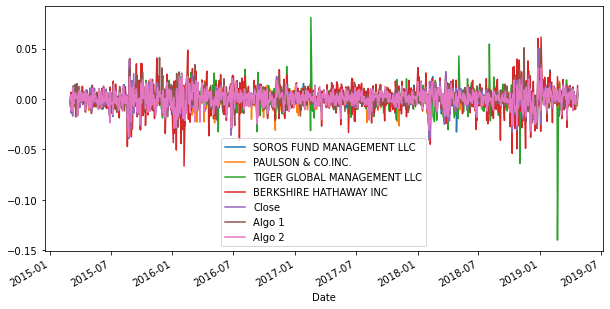

In [141]:
# Plot daily returns
combine_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

In [142]:
# Calculate cumulative returns
cumulative_returns = (combine_df).cumprod() 
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close,Algo 1,Algo 2
Date,,,,,,,
2019-04-16,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
2019-04-17,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
2019-04-18,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2019-04-22,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
2019-04-23,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0


<AxesSubplot:xlabel='Date'>

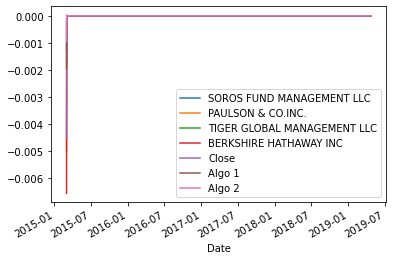

In [143]:
# Plot cumulative returns
cumulative_returns.plot()

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

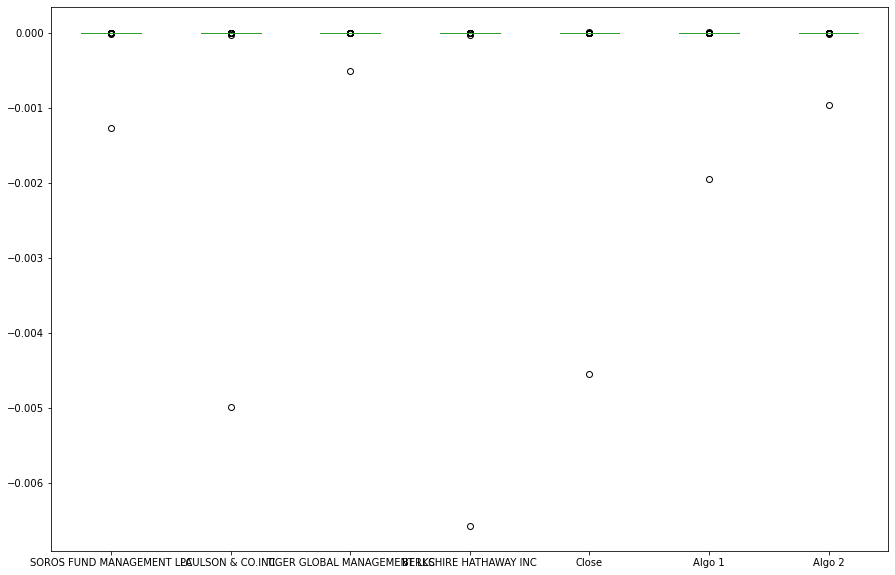

In [144]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(15,10))

### Calculate Standard Deviations

In [145]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
standard_deviation_df = combine_df.std()
standard_deviation_df.head()
# Which portfolios are riskier than the S&P 500?
risky_df = standard_deviation_df[standard_deviation_df > standard_deviation_df["Close"]]
risky_df.tail()

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [146]:
print (standard_deviation_df["Close"])

0.008553731597758204


### Determine which portfolios are riskier than the S&P 500

In [147]:
# Determine which portfolios are riskier than the S&P 500
risky_df = standard_deviation_df[standard_deviation_df > standard_deviation_df["Close"]]
risky_df.head()

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [148]:
# Calculate the annualized standard deviation (252 trading days)
standard_deviation_df * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Close                          0.135786
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [149]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combine_df = pd.concat([whale_returns_df, spdaily_returns], axis="columns", join="inner")
combine_df = combine_df.dropna()
rolling_df = combine_df.rolling(window=21).std()
rolling_df.dropna().tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
Date,,,,,
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.006094
2019-04-23,0.004315,0.005695,0.004949,0.006602,0.004325


### Calculate and plot the correlation

In [150]:
# Calculate the correlation
# Display the correlation matrix
rolling_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.664590,0.451969,0.859187,0.911914
PAULSON & CO.INC.,0.664590,1.000000,0.407927,0.631215,0.597760
TIGER GLOBAL MANAGEMENT LLC,0.451969,0.407927,1.000000,0.413311,0.414108
BERKSHIRE HATHAWAY INC,0.859187,0.631215,0.413311,1.000000,0.812766
Close,0.911914,0.597760,0.414108,0.812766,1.000000


<AxesSubplot:xlabel='Date'>

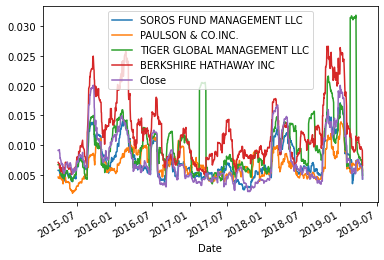

In [151]:
#plot the correlation
rolling_df.plot()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [152]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Calculate covariance of a single portfolio
# Calculate variance of S&P 500
# Computing beta
covariance = combine_df['SOROS FUND MANAGEMENT LLC'].cov(combine_df['Close'])
variance = combine_df['SOROS FUND MANAGEMENT LLC'].var()
SOROS_beta = covariance / variance
SOROS_beta

0.90772936811754

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [153]:
# Calculate a rolling window using the exponentially weighted moving average.
combine_df.ewm(span=21)

ExponentialMovingWindow [com=10.0,min_periods=1,adjust=True,ignore_na=False,axis=0]

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [154]:
# Annualized Sharpe Ratios
sharp=combine_df.mean()/combine_df.std()
sharp.tail()

SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
Close                          0.040837
dtype: float64

<AxesSubplot:>

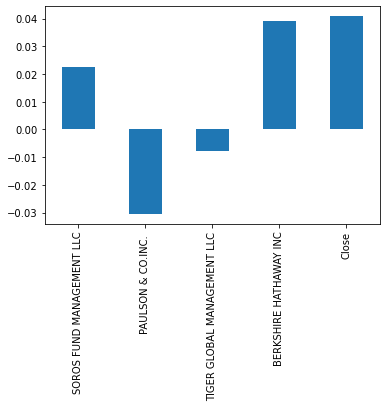

In [155]:
# Visualize the sharpe ratios as a bar plot
sharp.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [156]:
# Read the first stock
goog_hist_csv = Path("../resources/goog_historical.csv")
goog_hist_df = pd.read_csv(goog_hist_csv, index_col = "Trade DATE", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
goog_hist_df = goog_hist_df.rename(columns = {"NOCP":"Google"})
goog_hist_df.tail()

,Symbol,Google
Trade DATE,,
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10
2019-05-08,GOOG,1166.27
2019-05-09,GOOG,1162.38


In [157]:
goog_hist_df.drop(columns= "Symbol")

,Google
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59
...,...
2019-05-03,1185.40
2019-05-06,1189.39
2019-05-07,1174.10


In [165]:
# Read the second stock
cost_csv = Path("../resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col = "Trade DATE", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
cost_df = cost_df.rename(columns = {"NOCP":"Costco"})
cost_df.tail()

,Symbol,Costco
Trade DATE,,
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18
2019-05-08,COST,241.34
2019-05-09,COST,243.47


In [178]:
cost_df.drop(columns= "Symbol")
#set cost_df =  cost_df.drop(columns="Symbol" )

,Costco
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
...,...
2019-05-03,244.62
2019-05-06,244.23
2019-05-07,240.18


In [160]:
# Read the third stock
appl_hist_csv = Path("../resources/aapl_historical.csv")
appl_df = pd.read_csv(appl_hist_csv, index_col = "Trade DATE", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
appl_df = appl_df.rename(columns = {"NOCP":"Apple"})
appl_df.tail()

,Symbol,Apple
Trade DATE,,
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86
2019-05-08,AAPL,202.90
2019-05-09,AAPL,200.72


In [177]:
appl_df.drop(columns= "Symbol")

,Symbol,Apple
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [184]:
# Combine all stocks in a single DataFrame
combine_port = pd.concat([goog_hist_df, cost_df, appl_df], axis="columns", join="inner")
combine_port


,Symbol,Google,Symbol,Costco,Symbol,Apple
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,COST,195.76,AAPL,188.59
2018-05-14,GOOG,1100.20,COST,195.88,AAPL,188.15
2018-05-15,GOOG,1079.23,COST,195.48,AAPL,186.44
2018-05-16,GOOG,1081.77,COST,198.71,AAPL,188.18
2018-05-17,GOOG,1078.59,COST,199.60,AAPL,186.99
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,COST,244.62,AAPL,211.75
2019-05-06,GOOG,1189.39,COST,244.23,AAPL,208.48
2019-05-07,GOOG,1174.10,COST,240.18,AAPL,202.86


In [185]:
# Reset the index
combine_port = combine_port.reset_index()
combine_port

,Trade DATE,Symbol,Google,Symbol,Costco,Symbol,Apple
0,2018-05-11,GOOG,1098.26,COST,195.76,AAPL,188.59
1,2018-05-14,GOOG,1100.20,COST,195.88,AAPL,188.15
2,2018-05-15,GOOG,1079.23,COST,195.48,AAPL,186.44
3,2018-05-16,GOOG,1081.77,COST,198.71,AAPL,188.18
4,2018-05-17,GOOG,1078.59,COST,199.60,AAPL,186.99
...,...,...,...,...,...,...,...
245,2019-05-03,GOOG,1185.40,COST,244.62,AAPL,211.75
246,2019-05-06,GOOG,1189.39,COST,244.23,AAPL,208.48
247,2019-05-07,GOOG,1174.10,COST,240.18,AAPL,202.86
248,2019-05-08,GOOG,1166.27,COST,241.34,AAPL,202.90


In [206]:
#Reorganize portfolio data by having a column per symbol
combine_port = combine_port.pivot_table(index= "Trade DATE")
combine_port

,Apple,Costco,Google
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [207]:
# Drop Nulls
combine_port.dropna()
combine_port.tail()

,Apple,Costco,Google
Trade DATE,,,
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10
2019-05-08,202.90,241.34,1166.27
2019-05-09,200.72,243.47,1162.38


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [208]:
# Calculate weighted portfolio returns
# Reorganize portfolio data by having a column per symbol
# Set weights
weights = [1/3, 1/3, 1/3]
combine_port[["Google", "Costco", "Apple"]]/weights
combine_port.tail()

,Apple,Costco,Google
Trade DATE,,,
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10
2019-05-08,202.90,241.34,1166.27
2019-05-09,200.72,243.47,1162.38


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [214]:
# Join your returns DataFrame to the original returns DataFrame

#all_df = pd.concat(combine_port,combine_df)
all_df = pd.concat([combine_port,combine_df], axis="columns", join="inner")
all_df.tail()

,Apple,Costco,Google,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
2019-04-16,199.25,245.34,1227.13,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,203.13,245.56,1236.34,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,203.86,245.81,1236.37,0.001448,0.001222,0.000582,0.001916,0.001579
2019-04-22,204.53,243.42,1248.84,-0.002586,-0.007333,-0.003640,-0.001088,0.001012
2019-04-23,207.48,245.58,1264.55,0.007167,0.003485,0.006472,0.013278,0.008841


In [216]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_df.dropna()
all_df.tail()

,Apple,Costco,Google,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
2019-04-16,199.25,245.34,1227.13,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,203.13,245.56,1236.34,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,203.86,245.81,1236.37,0.001448,0.001222,0.000582,0.001916,0.001579
2019-04-22,204.53,243.42,1248.84,-0.002586,-0.007333,-0.003640,-0.001088,0.001012
2019-04-23,207.48,245.58,1264.55,0.007167,0.003485,0.006472,0.013278,0.008841


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [218]:
# Calculate the annualized `std`
all_df * np.sqrt(252)
all_df.tail()

,Apple,Costco,Google,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
2019-04-16,199.25,245.34,1227.13,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,203.13,245.56,1236.34,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,203.86,245.81,1236.37,0.001448,0.001222,0.000582,0.001916,0.001579
2019-04-22,204.53,243.42,1248.84,-0.002586,-0.007333,-0.003640,-0.001088,0.001012
2019-04-23,207.48,245.58,1264.55,0.007167,0.003485,0.006472,0.013278,0.008841


### Calculate and plot rolling `std` with 21-day window

In [220]:
# Rolling
all_df.rolling(window=21).std().dropna()
all_df.tail()

,Apple,Costco,Google,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
2019-04-16,199.25,245.34,1227.13,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,203.13,245.56,1236.34,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,203.86,245.81,1236.37,0.001448,0.001222,0.000582,0.001916,0.001579
2019-04-22,204.53,243.42,1248.84,-0.002586,-0.007333,-0.003640,-0.001088,0.001012
2019-04-23,207.48,245.58,1264.55,0.007167,0.003485,0.006472,0.013278,0.008841


<AxesSubplot:>

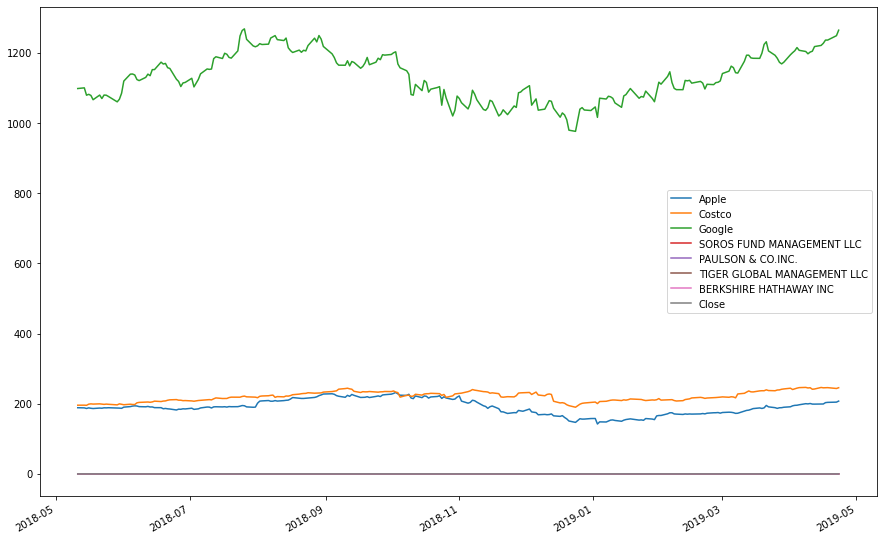

In [221]:
# Plot rolling standard deviation
all_df.plot(figsize=(15,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [223]:
# Calculate and plot Beta
all_df.rolling(window=60).std().dropna()
all_df.tail()

,Apple,Costco,Google,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
2019-04-16,199.25,245.34,1227.13,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,203.13,245.56,1236.34,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,203.86,245.81,1236.37,0.001448,0.001222,0.000582,0.001916,0.001579
2019-04-22,204.53,243.42,1248.84,-0.002586,-0.007333,-0.003640,-0.001088,0.001012
2019-04-23,207.48,245.58,1264.55,0.007167,0.003485,0.006472,0.013278,0.008841


In [224]:
# Create a correlation analysis
all_df.corr()

,Apple,Costco,Google,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
Apple,1.000000,0.565591,0.538068,-0.047528,0.006708,0.027448,-0.083641,-0.005174
Costco,0.565591,1.000000,0.489901,0.035297,0.009566,0.036355,0.003951,0.063503
Google,0.538068,0.489901,1.000000,0.122046,0.138976,0.096784,0.066905,0.179623
SOROS FUND MANAGEMENT LLC,-0.047528,0.035297,0.122046,1.000000,0.791191,0.477722,0.816670,0.876089
PAULSON & CO.INC.,0.006708,0.009566,0.138976,0.791191,1.000000,0.485421,0.650499,0.766696
TIGER GLOBAL MANAGEMENT LLC,0.027448,0.036355,0.096784,0.477722,0.485421,1.000000,0.325080,0.481095
BERKSHIRE HATHAWAY INC,-0.083641,0.003951,0.066905,0.816670,0.650499,0.325080,1.000000,0.851968
Close,-0.005174,0.063503,0.179623,0.876089,0.766696,0.481095,0.851968,1.000000


In [225]:
# Beta
covariance = combine_port['Google'].cov(combine_port['Apple'])
variance = combine_port['Google'].var()
SOROS_beta = covariance / variance
SOROS_beta

0.1721383121258948

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [226]:
# Annualized Sharpe Ratios
sharp = all_df.mean()/all_df.std()
sharp.head()

Apple                         8.794983
Costco                       15.879432
Google                       16.949868
SOROS FUND MANAGEMENT LLC     0.024911
PAULSON & CO.INC.             0.016827
dtype: float64

<AxesSubplot:>

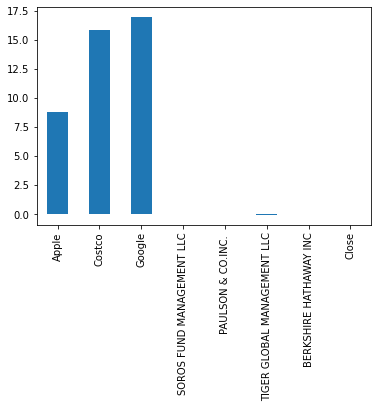

In [227]:
# Visualize the sharpe ratios as a bar plot
sharp.plot.bar()

### How does your portfolio
Not good 